In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10000

In [3]:
ip = np.random.rand(N) > 0.5
ip = ip.astype(int)

In [4]:
s = 2 * ip - 1

In [5]:
Es = 1

In [6]:
eb_no_db = np.arange(0,25)


In [7]:
capacity_rate = np.zeros(len(eb_no_db))
capacity_rate_reduced = np.zeros(len(eb_no_db))

In [8]:
# snr = 10**eb_no_db/10

In [9]:
def Capacity_Rs():
    
    capacity_rate = np.zeros(len(eb_no_db))  # Initialize an array to store results
    
    for jj in range(len(eb_no_db)):
        
        nTx = 4
        
        nRx = 4
        
        snr = 10**(eb_no_db[jj] / 10)
        
        Rz = 10**(-eb_no_db[jj] / 10) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        Rs = np.divide(Es, nTx) * np.eye(nTx)
        
        capacity = 0
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h13 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h14 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h23 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h24 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h31 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h32 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h33 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h34 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h41 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h42 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h43 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h44 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h12, h13, h14],
                          [h21, h22, h23, h24],
                          [h31, h32, h33, h34],
                          [h41, h42, h43, h44]])
    
            H_hermitian = np.conjugate(H)
        
            H_hermitian = np.transpose(H_hermitian)
            
            X = np.dot(np.dot(np.dot(Rz_inverse, H), Rs), H_hermitian)
            
            Y = np.eye(4)
            
            Z = X + Y
            
            c = np.log2(np.abs(np.linalg.det(Z)))
            
            capacity += c

        capacity =capacity / N
        
        capacity_rate[jj] = capacity
        
        

    return capacity_rate


In [10]:
def capacity_reduced_form():
    
    for jj in range(len(eb_no_db)):
        
        nTx = 4
        
        nRx = 4
        
        Rz = 10**(-eb_no_db[jj] / 10) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            H_v = H.flatten()
            
            H_var = np.var(H_v)
            
            noise_variance = 10**(-eb_no_db[jj] / 10)
        
            c=np.log2(1 + (Es/nTx)*(1/noise_variance)*H_var)
            
            capacity = capacity + c
        
        capacity = capacity / N
        
        capacity_rate_reduced[jj] = capacity
        
    return capacity_rate_reduced
            
            

[0.3018733  0.37055941 0.45412656 0.54747566 0.66268554 0.78903302
 0.93652419 1.10734309 1.29353098 1.49814573 1.7166635  1.95820033
 2.21016216 2.47245398 2.74506228 3.03927663 3.32701534 3.63027298
 3.93747242 4.24999456 4.56305459 4.87994086 5.20795537 5.53046617
 5.85810372]


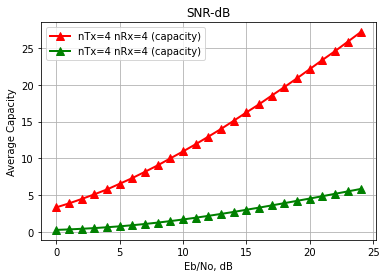

In [11]:
capacity = Capacity_Rs() 
capacity_reduced_form = capacity_reduced_form()
print(capacity_reduced_form)
plt.figure()

plt.plot(eb_no_db, capacity, 'r^-', linewidth=2, markersize=8, label='nTx=4 nRx=4 (capacity)')

plt.plot(eb_no_db, capacity_reduced_form, 'g^-', linewidth=2, markersize=8, label='nTx=4 nRx=4 (capacity)')

plt.grid(True)

plt.legend()

plt.xlabel('Eb/No, dB')

plt.ylabel('Average Capacity')

plt.title('SNR-dB')

plt.show()